<a href="https://colab.research.google.com/github/C-Little26/ECGR4105/blob/main/Hw4/ECGR4105_Hw4_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#necessary libraries
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
filepath_can = '/content/drive/My Drive/Machine Learning/Datasets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(filepath_can))
cancer = cancer.drop('Unnamed: 32', axis=1) #was found to be null
cancer.isnull().sum()*100/cancer.shape[0] #use to check for null values

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: f

In [3]:
#define the function to remap the diagnosis
def binary_map(x):
    return x.map({"B": 1, "M": 0})

In [4]:
#remap diagnosis
varlist = ['diagnosis']
cancer[varlist] = cancer[varlist].apply(binary_map)
#create new vectors
Y = cancer.pop('diagnosis')
X = cancer.drop('id', axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#split between training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size =0.2, random_state = 0)
x_train.shape

(455, 30)

In [6]:
#standardize all features
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_val = sc_x.fit_transform(x_val)

In [7]:
#PCA function
def reduceFeatures(x_t,x_v,K):
  pca = PCA(n_components=K)
  x_tr = pca.fit_transform(x_t)
  x_vr = pca.fit_transform(x_v)
  return x_tr, x_vr

In [8]:
#determine the optimal number of components
accuracy_high = 0.0
accuracies = []
all_highs = []
precisions = []
recalls = []
f1 = []
for K in range(1,31):
  x_t, x_v = reduceFeatures(x_train,x_val,K)
  clf = SVC(kernel='linear', C=1E3) #redefine classifier
  clf.fit(x_t, y_train) #fit classifier
  y_pred = clf.predict(x_v)

  accuracies.append(metrics.accuracy_score(y_val,y_pred))
  precisions.append(metrics.precision_score(y_val,y_pred))
  recalls.append(metrics.recall_score(y_val,y_pred))
  f1.append(metrics.f1_score(y_val,y_pred))
  if(metrics.accuracy_score(y_val,y_pred) > accuracy_high):
    accuracy_high = metrics.accuracy_score(y_val,y_pred)
    K_high = K
print("Most Accurate K value: ", K_high)
print("Accuracy:", accuracy_high)



Most Accurate K value:  8
Accuracy: 0.956140350877193


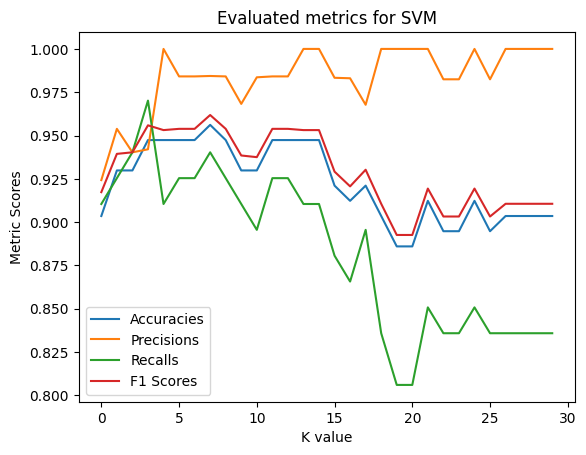

In [9]:
plt.plot(accuracies, label="Accuracies")
plt.plot(precisions, label="Precisions")
plt.plot(recalls, label="Recalls")
plt.plot(f1, label="F1 Scores")
plt.xlabel("K value")
plt.ylabel("Metric Scores")
plt.legend()
plt.title("Evaluated metrics for SVM")
plt.show()

In [10]:
#explore various kernel tricks
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
K = 8 #use the most accurate value for K
c = 1E3
x_tk, x_vk = reduceFeatures(x_train,x_val,K)
svc_linear = SVC(kernel='linear',C=c)
svc_poly = SVC(kernel='poly', C=c)
svc_rbf = SVC(kernel='rbf', C=c)
svc_sigmoid = SVC(kernel='sigmoid', C=c)
svc_prec = SVC(kernel='precomputed', C=c)
#fit all models
svc_linear.fit(x_tk,y_train)
svc_poly.fit(x_tk,y_train)
svc_rbf.fit(x_tk,y_train)
svc_sigmoid.fit(x_tk,y_train)
#svc_prec.fit(x_tk,y_train)
#find predictions
yp_linear = svc_linear.predict(x_vk)
yp_poly = svc_poly.predict(x_vk)
yp_rbf = svc_rbf.predict(x_vk)
yp_sigmoid = svc_sigmoid.predict(x_vk)
#yp_prec = svc_prec.predict(x_vk)
#find accuracies
acc_linear = metrics.accuracy_score(y_val, yp_linear)
acc_poly = metrics.accuracy_score(y_val, yp_poly)
acc_rbf = metrics.accuracy_score(y_val, yp_rbf)
acc_sigmoid = metrics.accuracy_score(y_val, yp_sigmoid)
print(acc_linear)

0.956140350877193


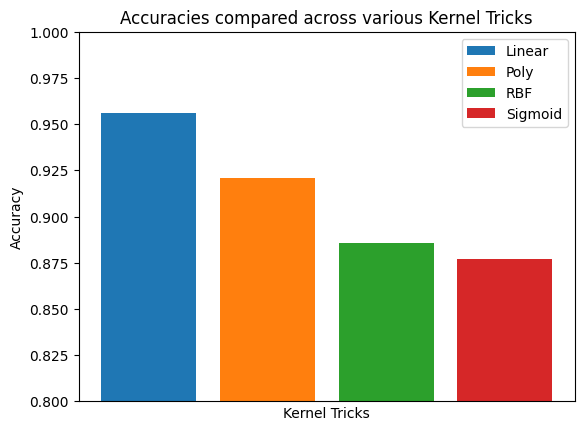

In [13]:
#plot accuracies against each other
plt.bar(height=acc_linear, x=1, label='Linear')
plt.bar(height=acc_poly, x=2, label='Poly')
plt.bar(height=acc_rbf, x=3, label='RBF')
plt.bar(height=acc_sigmoid, x=4, label='Sigmoid')
plt.ylim((0.8,1))
plt.xlabel("Kernel Tricks")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks([])
plt.title("Accuracies compared across various Kernel Tricks")
plt.show()